In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
import scipy as sp
from numpy.linalg import pinv
from numpy.random import randint, normal
from networkx.algorithms.clique import find_cliques, enumerate_all_cliques, make_max_clique_graph, graph_number_of_cliques
from networkx.algorithms.matching import maximal_matching
from networkx.algorithms.operators.unary import complement
from networkx.generators.random_graphs import erdos_renyi_graph #CHANGE THIS IMPORT TO INCLUDE OTHER GRAPH TYPES
from networkx.linalg.algebraicconnectivity import algebraic_connectivity
from scipy import stats
import itertools as it
from collections import Counter

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import block_RK as ac

In [3]:
# Adjust plot size
plt.rcParams["figure.figsize"] = (8, 8)

# ER Experiments

### graph set up

In [4]:
# Initialize Graph
n = 200
p = 0.6
G = erdos_renyi_graph(n, p)
m = len(G.edges())

In [5]:
# Initialize Incidence Matrix
A = nx.linalg.graphmatrix.incidence_matrix(G)
A = sp.sparse.csr_matrix.todense(A).transpose()
# their incidence matrix is binary, we need to convert one of the ones to a -1
for i in range(np.shape(A)[0]):
    negindex = np.where(A[i,:] == 1)
    A[i,negindex[1][0]] = -1

In [6]:
# Fix x, b
# Secret initial vector x
x = np.random.rand(n,1)
# Zero Vector b
b = np.zeros((m,1))
# Find mean of x
xbar = np.mean(x)
# Create solution vector (vector with just xbar as values)
sol = np.full((n,1), xbar)

### l = 25

In [7]:
N = 400
l = 25
paths0, test_x0, x_list0, errs0 = ac.blockRK_path(A, G, sol, b, N, x, l)

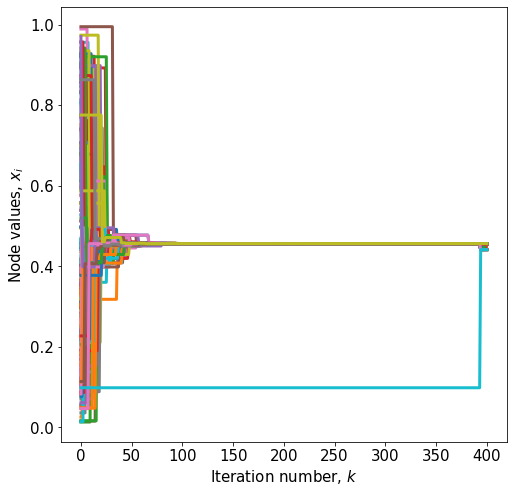

<Figure size 576x576 with 0 Axes>

In [8]:
ac.collapse_plt(x_list0, n, N)
plt.show()
plt.savefig("plots/ER_L50_path_collapse.svg", format='svg')

In [10]:
bound25, r25, err25 = ac.error_plt(errs0, G, paths0, sol, N, 'path')
plt.show()
plt.savefig("plots/ER_L50_path_error.svg", format='svg')

KeyboardInterrupt: 

### l = 50

In [ ]:
N = 400
l = 50
paths, test_x, x_list, errs1 = ac.blockRK_path(A, G, sol, b, N, x, l)

In [ ]:
ac.collapse_plt(x_list, n, N)
plt.show()
plt.savefig("plots/ER_L50_path_collapse.svg", format='svg')

In [ ]:
bound50, r50, err50 = ac.error_plt(errs, G, paths, sol, N, 'path')
plt.show()
plt.savefig("plots/ER_L50_path_error.svg", format='svg')

### l = 100

In [ ]:
N = 400
l = 100
paths2, x2, xlist2, errs2 = ac.blockRK_path(A, G, sol, b, N, x, l)

In [ ]:
ac.collapse_plt(xlist2, n, N)
plt.show()
plt.savefig("plots/ER_L100_path_collapse.svg", format='svg')

In [ ]:
bound100, r100, err100 = ac.error_plt(errs2, G, paths2, sol, N, 'path')
plt.show()
plt.savefig("plots/ER_L100_path_error.svg", format='svg')

### l = 150

In [ ]:
N = 400
l = 150
paths3, x3, xlist3, errs3 = ac.blockRK_path(A, G, sol, b, N, x, l)

In [ ]:
ac.collapse_plt(xlist3, n, N)
plt.show()
plt.savefig("plots/ER_L150_path_collapse.svg", format='svg')

In [ ]:
bound150, r150, err150 = ac.error_plt(errs3, G, paths3, sol, N, 'path')
plt.show()
plt.savefig("plots/ER_L150_path_error.svg", format='svg')

### path length vs constant

In [ ]:
r_list = [(25, r25), (50, r50), (100, r100), (150, r150)]

In [ ]:
plt.scatter(*zip(*r_list))
plt.legend(prop={'size': 15})
plt.xlabel('Path Length', fontsize=15)
plt.ylabel(r'Rate Constant', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig("plots/ER_path_rate.svg", format='svg')

### path length vs convergence

In [ ]:
plt.semilogy(range(np.shape(errors)[0]), errs0, 'b', linewidth=4, label = r'l = 25')
plt.semilogy(range(np.shape(errors)[0]), errs1, 'r', linewidth=4, label = r'l = 50')
plt.semilogy(range(np.shape(errors)[0]), errs2, 'g', linewidth=4, label = r'l = 100')
plt.semilogy(range(np.shape(errors)[0]), errs3, 'p', linewidth=4, label = r'l = 150')
plt.legend(prop={'size': 15})
plt.xlabel('Iteration number, $k$', fontsize=15)
plt.ylabel(r'$||c_k-c*||^2$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()